In [2]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
tf.__version__

'2.5.0'

In [5]:
images_folder = "./images"
imgs = []

for image in os.listdir(images_folder):
    img = cv2.imread(os.path.join(images_folder, image))
    img = cv2.resize(img, (200,200))
    imgs.append(img)

imgs = np.array(imgs)

In [4]:
model_folder = "./canny_model"
model_name = "tf_canny_edge.h5"

model = tf.keras.models.load_model(os.path.join(model_folder, model_name))

In [6]:
edges = model.predict(imgs)

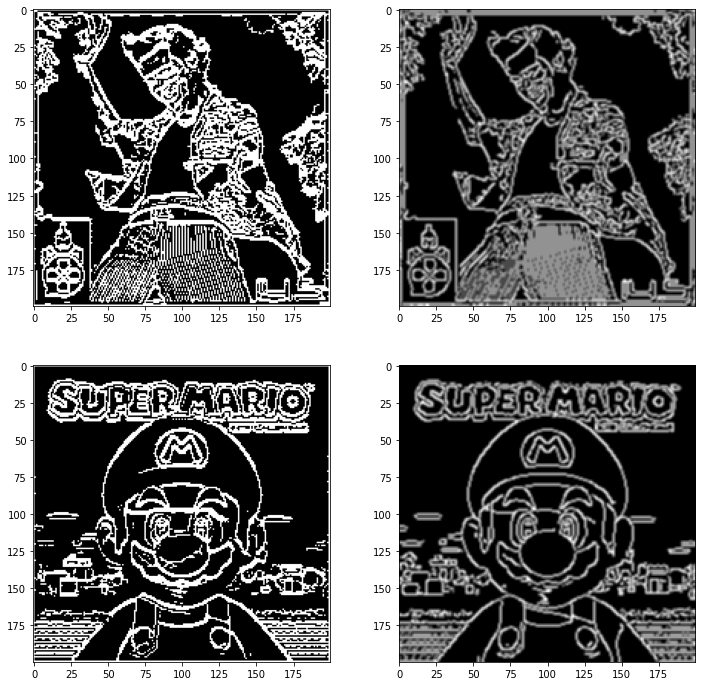

In [10]:
# on the left : tf model
# on the right : cv2.Canny

# both algorithm have a gaussian kernel size of 3
# both algorithm have sobel kernels size of 3

fig = plt.figure(figsize=(12,12))
columns = 2
rows = 2
img_index = 0
for i in range(1, columns*rows+1, 2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(edges[img_index], cmap='gray')
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(cv2.GaussianBlur(cv2.Canny(imgs[img_index], 100, 200, apertureSize=3), (3,3), 0), cmap='gray')
    img_index += 1
plt.show()